In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
filename = 'data_evaluacion.csv'
data = pd.read_csv(filename)

In [3]:
# Renombrar las columnas para facilitar su uso
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
                'hours_per_week', 'native_country', 'income']

In [4]:
print (data.shape)
data.head(5)

(48841, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# Codificación de variables categóricas
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 
                        'relationship', 'race', 'sex', 'native_country']

In [6]:
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

In [7]:
income_encoder = LabelEncoder()
data['income'] = income_encoder.fit_transform(data['income'])

In [8]:
# Separar las características (X) y la etiqueta (y)
X = data.drop('income', axis=1)
y = data['income']

In [9]:
# Escalar los datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Definir los kernels a utilizar
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = {}
classification_reports = {}
roc_auc_scores = {}

In [12]:
# Función para entrenar y evaluar SVM con un kernel específico
def train_and_evaluate(kernel):
    svm = SVC(kernel=kernel, probability=True)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    y_proba = svm.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[kernel] = accuracy
    classification_reports[kernel] = classification_report(y_test, y_pred, output_dict=True)
    
    # Save the trained model and columns
    model_filename = f"svm_model_{kernel}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump({'model': svm, 'columns': X.columns.tolist(), 'label_encoders': label_encoders, 'scaler': scaler, 'income_encoder': income_encoder}, file)
    
    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[kernel] = roc_auc
    
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {kernel} Kernel')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=income_encoder.classes_, yticklabels=income_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {kernel} Kernel')
    plt.show()


Kernel: linear
Accuracy: 0.8154365851161839
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7464
           1       0.77      0.31      0.44      2305

    accuracy                           0.82      9769
   macro avg       0.80      0.64      0.66      9769
weighted avg       0.81      0.82      0.78      9769



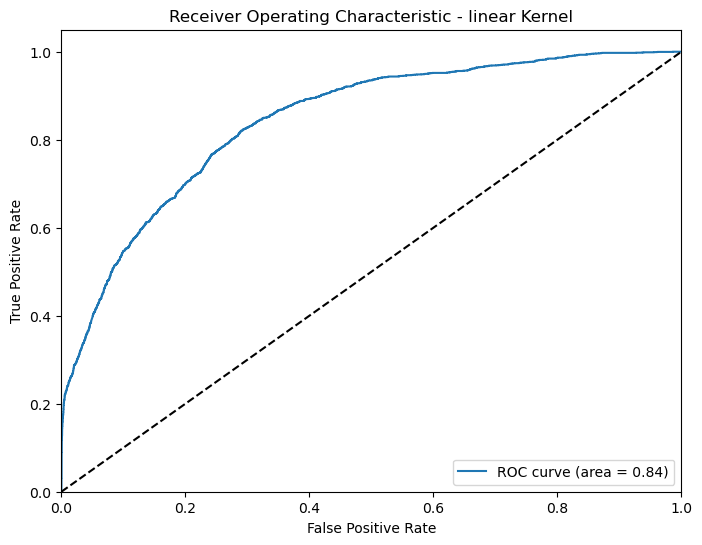

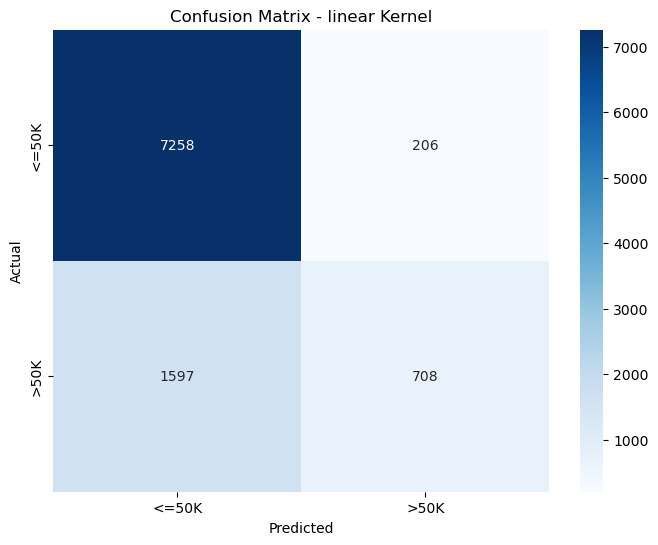


Kernel: poly
Accuracy: 0.8422561162862114
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7464
           1       0.74      0.50      0.60      2305

    accuracy                           0.84      9769
   macro avg       0.80      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769



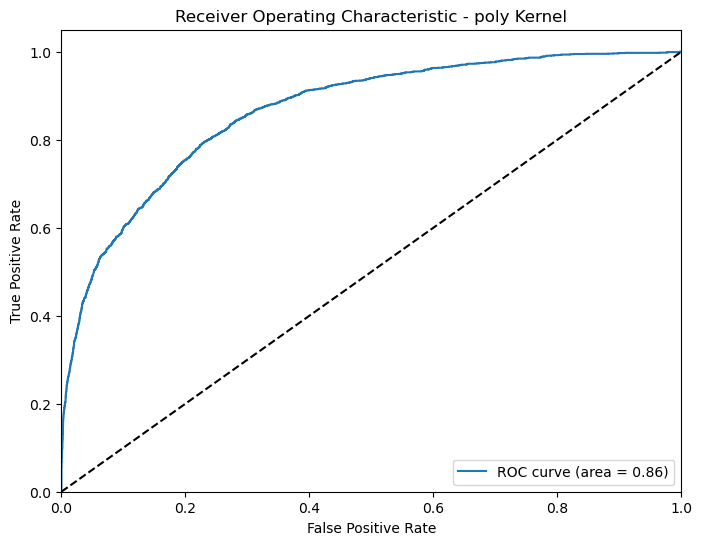

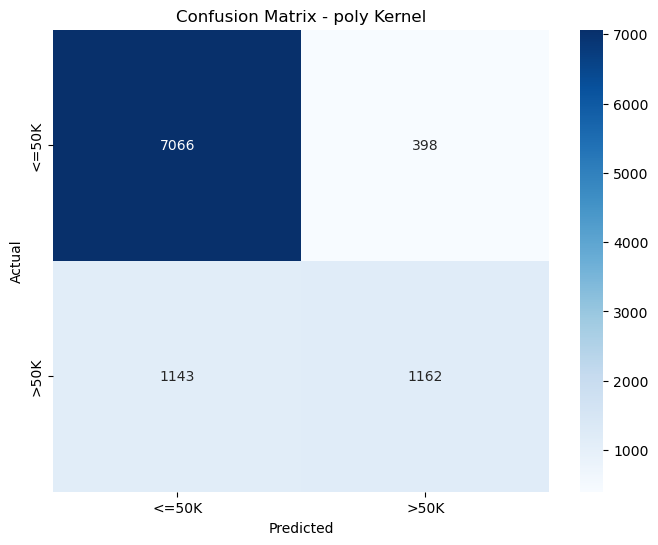


Kernel: rbf
Accuracy: 0.8453270549698024
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7464
           1       0.74      0.53      0.62      2305

    accuracy                           0.85      9769
   macro avg       0.80      0.74      0.76      9769
weighted avg       0.84      0.85      0.84      9769



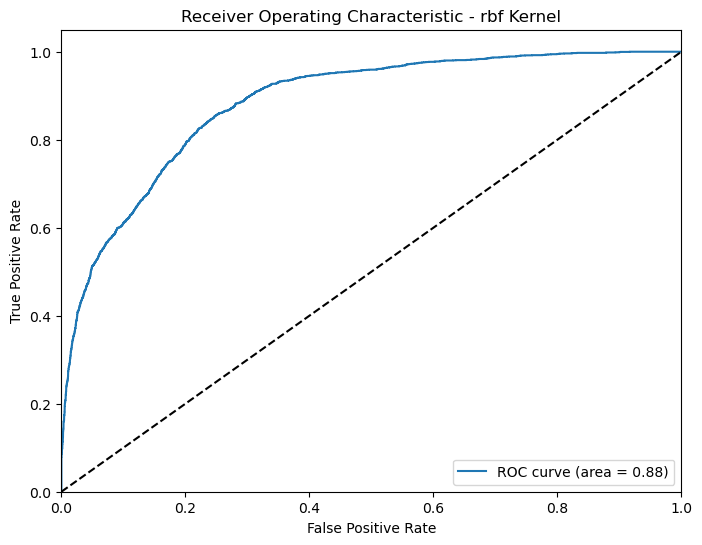

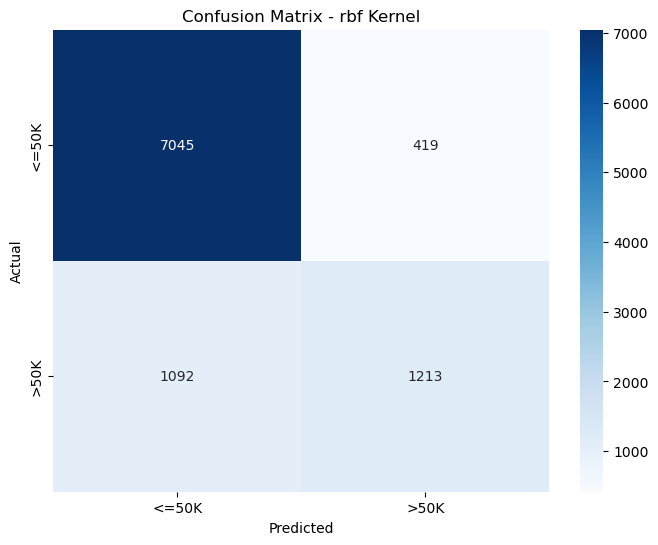


Kernel: sigmoid
Accuracy: 0.757702937864674
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7464
           1       0.49      0.49      0.49      2305

    accuracy                           0.76      9769
   macro avg       0.66      0.66      0.66      9769
weighted avg       0.76      0.76      0.76      9769



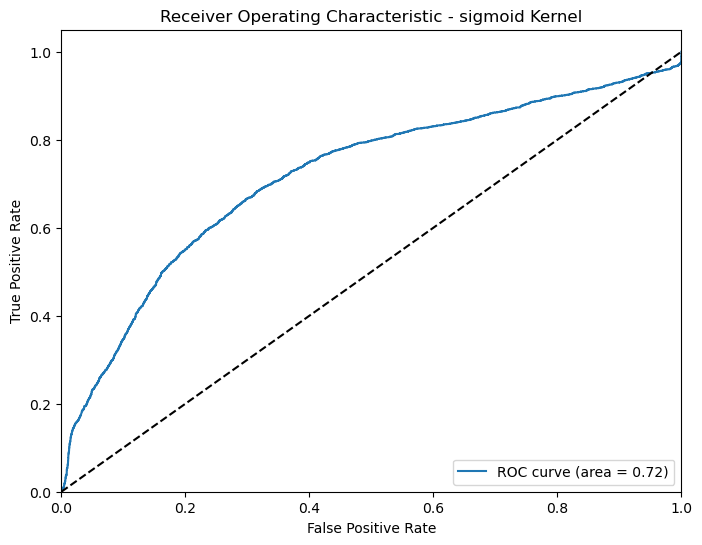

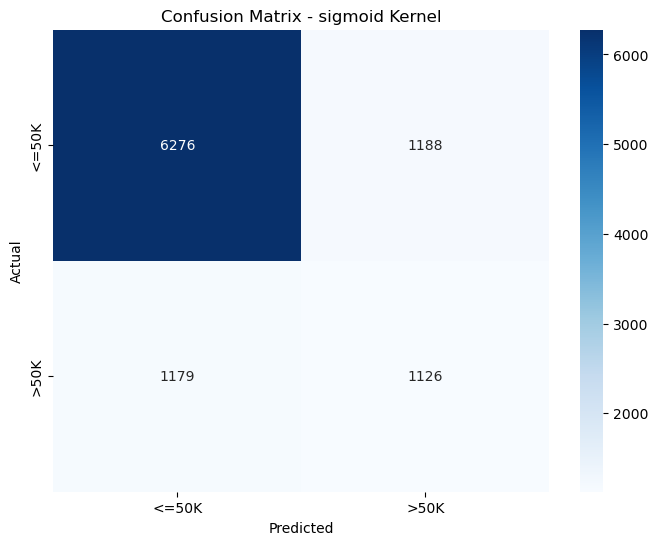

In [13]:
# Entrenar y evaluar el modelo para cada kernel individualmente
for kernel in kernels:
    train_and_evaluate(kernel)

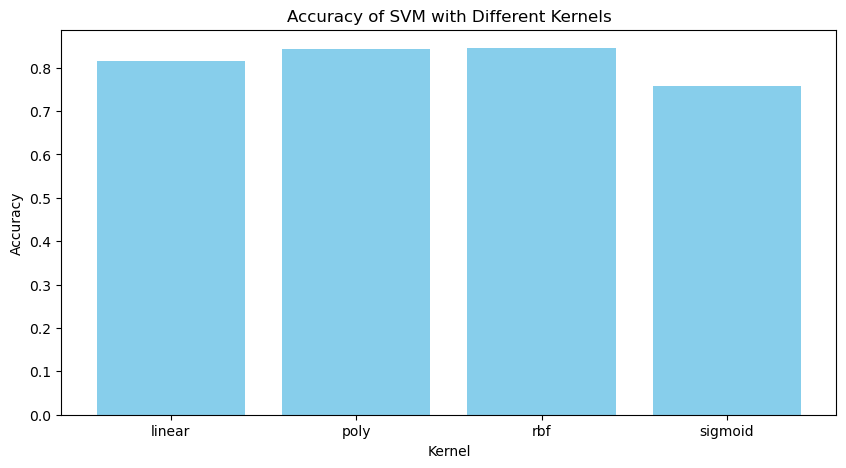

In [14]:
# Mostrar las precisiones en un gráfico
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM with Different Kernels')
plt.show()